In [20]:
from collections import Counter, defaultdict
import re
import spacy
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load("en_core_web_sm")

In [3]:
%%time
import sys
sys.path.append('../google/tony-sun-intern-project/neutral_generation/')
from make_gender_neutral import is_gendered

CPU times: user 828 µs, sys: 1.09 ms, total: 1.92 ms
Wall time: 1.44 ms


In [4]:
def get_source_target(eval_set):
    with open(f'/Users/tonysun/google/tony-sun-intern-project/evaluation/{eval_set}/source.txt', 'r') as f:
        source = f.readlines()
    
    with open(f'/Users/tonysun/google/tony-sun-intern-project/evaluation/{eval_set}/target.txt', 'r') as f:
        target = f.readlines()
        
    return source, target

In [5]:
source, target = get_source_target('gendered_test_set')

In [6]:
len(source), len(target)

(500, 500)

In [7]:
token_counter = Counter()

for sent in source[:]:
    tokens = sent.lower().split(' ')
    for token in tokens:
        token_counter[token] += 1

In [8]:
# num of unique tokens
len(token_counter)

2522

In [9]:
total_tokens = 0
for token in token_counter:
    total_tokens += token_counter[token]
print(total_tokens)
print(total_tokens / 500)

6427
12.854


In [10]:
token_counter.most_common(20)

[('the', 274),
 ('a', 180),
 ('to', 158),
 ('he', 146),
 ('she', 136),
 ('and', 131),
 ('her', 122),
 ('in', 97),
 ('his', 95),
 ('was', 93),
 ('i', 88),
 ('of', 82),
 ('for', 63),
 ('is', 57),
 ('on', 50),
 ('that', 47),
 ('my', 46),
 ('with', 46),
 ('has', 38),
 ('you', 38)]

In [11]:
def clean_str(word):
    pattern = re.compile("[^a-zA-Z']+", re.UNICODE)
    word = pattern.sub('', word)
    return word.lower()

In [12]:
%%time
change_type = Counter()
total_changes = 0

for source_sent, target_sent in zip(source, target):
    source_sent = source_sent.split(' ')
    target_sent = target_sent.split(' ')
    
    if len(source_sent) != len(target_sent):
        continue
        
    for i in range(len(source_sent)):
        if source_sent[i] != target_sent[i]:
            source_word = clean_str(source_sent[i])
            target_word = clean_str(target_sent[i])

            change_type[(source_word, target_word)] += 1
            
            total_changes += 1

CPU times: user 6 ms, sys: 297 µs, total: 6.3 ms
Wall time: 6.04 ms


In [13]:
total_changes

794

In [18]:
print(len(change_type))
change_type.most_common(20)

69


[(('he', 'they'), 146),
 (('she', 'they'), 137),
 (('his', 'their'), 95),
 (('her', 'their'), 83),
 (('her', 'them'), 55),
 (('him', 'them'), 48),
 (('was', 'were'), 42),
 (('is', 'are'), 23),
 (("he's", "they're"), 18),
 (('has', 'have'), 17),
 (("she's", "they're"), 15),
 (('herself', 'themself'), 9),
 (('does', 'do'), 8),
 (('says', 'say'), 8),
 (('goes', 'go'), 6),
 (("she'll", "they'll"), 4),
 (('wants', 'want'), 4),
 (('gets', 'get'), 4),
 (('tells', 'tell'), 4),
 (('makes', 'make'), 3)]

In [15]:
change_type_percent = Counter()
for change in change_type:
    change_type_percent[change] = '{:.2f}'.format(change_type[change] / total_changes)

In [16]:
change_type_percent.most_common(20)

[(('he', 'they'), '0.18'),
 (('she', 'they'), '0.17'),
 (('his', 'their'), '0.12'),
 (('her', 'their'), '0.10'),
 (('her', 'them'), '0.07'),
 (('him', 'them'), '0.06'),
 (('was', 'were'), '0.05'),
 (('is', 'are'), '0.03'),
 (('has', 'have'), '0.02'),
 (("she's", "they're"), '0.02'),
 (("he's", "they're"), '0.02'),
 (("she'll", "they'll"), '0.01'),
 (('does', 'do'), '0.01'),
 (('herself', 'themself'), '0.01'),
 (('wants', 'want'), '0.01'),
 (('says', 'say'), '0.01'),
 (('gets', 'get'), '0.01'),
 (('goes', 'go'), '0.01'),
 (('tells', 'tell'), '0.01'),
 (('begins', 'begin'), '0.00')]

In [52]:
def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 5 else ''

In [42]:
labels = [change[0] for change in change_type.most_common(20)]
sizes = [change[1] for change in change_type.most_common(20)]

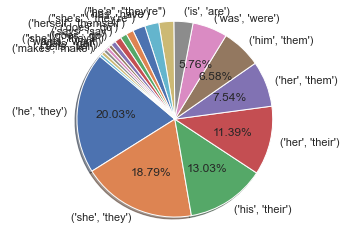

In [53]:
plt.pie(sizes, labels=labels,
autopct=my_autopct, shadow=True, startangle=140)

plt.axis('equal')
plt.show()